In [ ]:
!mkdir ~/.local/lib
!mkdir ~/.local/python3.7
!cp -r ~/packages/ISSI_tutorial_package/output_files/ISSItutorial ~/ISSItutorial
!cp -r ~/packages/ISSI_tutorial_package/output_files/ISSItutorial/local/lib/python3.7 ~/.local/lib/python3.7

cp -r ~/.local/lib/python3.7 ~/packages/issi_tutorial_package/output_files/ISSItutorial/local/lib/python3.7 

In [1]:
#Load libraries:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Load Journal of Informetrics Data:
sci_and_inf = pd.read_csv("query-results/sci_and_inf.csv", sep=',', header = 0)
sci_and_inf.head(n=10)

,paper_id,year,original_title,authors_display_name,journal_display_name
0,2294649429,2003,Development of a High Count Rate Readout Syste...,Emmanuel Zervakis|Yannis Papananos|Dimitris Lo...,Journal of Informetrics
1,2765976477,2017,The hot spot transformation in the research ev...,Ying Chen|Can Wu,Scientometrics
2,2081133965,1987,In search of influence: The testing of the Ort...,William E. Snizek,Scientometrics
3,2125355603,1994,Puberty or mid-life crisis,C. Le Pair,Scientometrics
4,2045322537,1980,Science and science policy in the Arab world,Michael J. Moravcsik,Scientometrics
5,2034500528,1990,Subject-based publication activity indicators ...,B. M. Gupta|S. C. Sharma|N. N. Mehrotra,Scientometrics
6,2009797479,2013,Economic statistics and scientometrics,Cornelis A. van Bochove,Scientometrics
7,2029138605,1983,Statistical reliability of comparisons based o...,András Schubert|Wolfgang Glänzel,Scientometrics
8,1765839524,2012,Comments on the Discussion Paper,BraunTibor,Scientometrics
9,2899270272,2018,A bibliometric method for assessing technologi...,René Lezama-Nicolás|Marisela Rodríguez-Salvado...,Scientometrics


In [9]:
scien_yd = sci_and_inf[sci_and_inf.journal_display_name == 'Scientometrics']

scien_yd2 = scien_yd[['paper_id', 'year']]

scien_yd = scien_yd2.groupby(['year']).count()

In [26]:
inf_yd = sci_and_inf[sci_and_inf.journal_display_name == 'Journal of Informetrics']

inf_yd2 = inf_yd[['paper_id', 'year']]

inf_yd = inf_yd2.groupby(['year']).count()

In [24]:
yd = scien_yd.merge(inf_yd, left_on='year', right_on='year', how = 'outer')

yd.reset_index(inplace=True)

yd = yd.sort_values('year')

yd.columns = ['year', 'Scientometrics', 'Journal of Informetrics']

yd = yd.fillna(0)

yd = yd[1:-1]

print(yd)

    year  Scientometrics  Journal of Informetrics
0   1978             6.0                      0.0
1   1979            21.0                      0.0
2   1980            35.0                      2.0
3   1981            30.0                      0.0
4   1982            28.0                      1.0
5   1983            24.0                      0.0
6   1984            32.0                      0.0
7   1985            57.0                      0.0
8   1986            46.0                      0.0
9   1987            67.0                      1.0
10  1988            56.0                      0.0
11  1989            79.0                      0.0
12  1990            67.0                      0.0
13  1991            83.0                      0.0
14  1992            89.0                      1.0
15  1993            65.0                      1.0
16  1994            92.0                      1.0
17  1995            90.0                      0.0
18  1996           101.0                      1.0


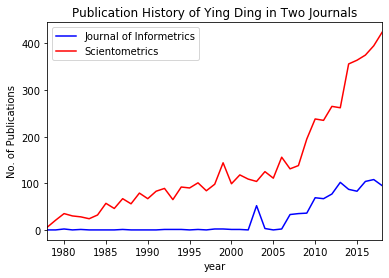

In [25]:
#Create plot:
yd.plot(x='year', y=['Journal of Informetrics', 'Scientometrics'], color=['blue', 'red'], kind='line')
plt.legend(loc = 2)
plt.ylabel(ylabel='No. of Publications')
plt.title(label = 'Publication History in Two Journals')
plt.show()